In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

engage_2_value_from_clicks_to_conversions_path = kagglehub.competition_download('engage-2-value-from-clicks-to-conversions')

print('Data source import complete.')


# Project_Title : Engage2Value: From Clicks to Conversions
* The goal of this competition is to predict a customer’s purchase value based on their multi-session behavior across digital engagement.
* The dataset captures anonymized user interactions such as browser types, traffic sources, device details, and geographical indicators.
* By modeling these patterns, we will estimate the purchase potential of each user, helping optimize marketing and engagement strategies.
  

# Loading the Dataset

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
##lists every file in /kaggle/input and prints its full path.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


# Importing some frequently used python libraries


In [ ]:
from IPython.display import display, Markdown
import seaborn as sns
import matplotlib.pyplot as plt # for plotting charts and plots
import numpy as np # linear algebra
import pandas as pd # data processing
import math # for mathematical computation

# Dataset storing from csv files to dataframe
* Train and Test dataset loading and storing into corresponding variables X_train and X_test
* Using pandas library converting CSV file into a dataframe format.
* train_data.csv converted into a datframe and stored into a variable named X_train.
* Similarly test_data.csv converted into a datframe and stored into a variable named X_test.



In [ ]:
#saving the train data in X_train
X_train = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
#loading the test data in dataframe, X_test
X_test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")

# Lets watch first 5 rows or data points of Train data set

In [ ]:
display(Markdown("Train dataset"))
print(X_train.head())

Train dataset

  trafficSource.isTrueDirect  purchaseValue            browser  \
0                        NaN            0.0               Edge   
1                       True            0.0             Chrome   
2                       True            0.0             Chrome   
3                        NaN            0.0  Internet Explorer   
4                       True     88950000.0             Chrome   

         device.screenResolution trafficSource.adContent  \
0  not available in demo dataset                     NaN   
1  not available in demo dataset                     NaN   
2  not available in demo dataset                     NaN   
3  not available in demo dataset                     NaN   
4  not available in demo dataset                     NaN   

  trafficSource.keyword screenSize geoCluster  \
0                   NaN     medium   Region_2   
1                   NaN     medium   Region_3   
2        (not provided)     medium   Region_2   
3                   NaN     medium   Region_4 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# Lets watch first 5 rows or data points of Test data set

In [ ]:
display(Markdown("Test dataset"))
print(X_test.head())

Test dataset

      userChannel      date browser             device.browserSize  \
0          Social  20170508  Chrome  not available in demo dataset   
1  Organic Search  20170405  Chrome  not available in demo dataset   
2  Organic Search  20170308  Safari  not available in demo dataset   
3        Referral  20171113  Chrome  not available in demo dataset   
4  Organic Search  20161212  Chrome  not available in demo dataset   

           device.browserVersion deviceType            device.flashVersion  \
0  not available in demo dataset    desktop  not available in demo dataset   
1  not available in demo dataset    desktop  not available in demo dataset   
2  not available in demo dataset    desktop  not available in demo dataset   
3  not available in demo dataset    desktop  not available in demo dataset   
4  not available in demo dataset    desktop  not available in demo dataset   

   device.isMobile                device.language  \
0            False  not available in demo dataset   
1   

# Focusing on the Exploratory Data Analysis (EDA)

# Data Shape
To know the structure of the train and test data looking for
* Data-shape tells how many rows and columns are present in dataset.It also tells the total number of data points and feature variable present in dataset respectively.

In [ ]:
display(Markdown("Data shape"))
print('train data-->',X_train.shape)
print('test data-->',X_test.shape)

Data shape

train data--> (116023, 52)
test data--> (29006, 51)



* The training data has a shape of (116023, 52) and the test data has a shape of (29006, 51).
* Train data has a target column, other than that both train Data and test data both has 51 feature columns.
* Train data has 116023 rows implies train data set has 115787 data points present.
* Test data has 29006 rows. It indicates test data set has 29006 data points.


# Data-type of feature columns

Data-type of feture column helps in identifying
1. If the feature column is of object data-type happens if the feature has string data values,
2. If the feature column is of float64 & int64 data-type happens if the feature has numeric data values,and
3. If the feature column is of bool data-type if the feature has 0 or 1 values only.

In [ ]:
display(Markdown("Data types of train data"))
print(X_train.info())

Data types of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

**Observation:**
* Above we have some data centric information about 51 feature columns and one target variable column, Such as-
   1.  Column-names i.e. feature names,
   2.  Total non-null values in each columns ,
   3.  Data type of that columns.This indicates the values of that feature column either a boolean or integer or float or object type.
      
* Observed: Following this feature columns:

  * **trafficSource.adContent**,**trafficSource.adwordsClickInfo.slot**,**trafficSource.adwordsClickInfo.isVideoAd**,**trafficSource.adwordsClickInfo.adNetworkType**,**socialEngagementType,geoNetwork.city**, has less than 5000 non-null values.

* Where as other feture column has higher than 10000 values of non-nulls are present there.This indicates feature columns with less than 5000 non-null values have high number of missing values present.


# Duplicates handling Process

In [ ]:
# Total duplicate rows
print("Total duplicate rows:", X_train.duplicated().sum())
print('--'*25)

# duplicate rows including the 1st occurrence row
duplicates = X_train[X_train.duplicated(keep=False)]
#sorting the duplicate row by userid, sessionStart,puchaseValue,etc
sort_duplicates = duplicates.sort_values(by=['userId', 'sessionStart','purchaseValue','sessionNumber','sessionId','pageViews','date','totalHits'])

# viewing the sorted duplicates of selected features.
print(sort_duplicates[['userId', 'sessionStart','purchaseValue','sessionNumber','sessionId','pageViews','date','totalHits']])

#removing duplicate rows and keeping only the original one
X_train = X_train.drop_duplicates()

Total duplicate rows: 236
--------------------------------------------------
       userId  sessionStart  purchaseValue  sessionNumber   sessionId  \
45054     719    1488148550      1500000.0              4  1488148550   
97089     719    1488148550      1500000.0              4  1488148550   
21336     720    1489167515            0.0              1  1489167515   
73026     720    1489167515            0.0              1  1489167515   
37513    1026    1500744389    126890000.0              2  1500744389   
...       ...           ...            ...            ...         ...   
75339  119965    1491591454    199920000.0              2  1491591454   
46107  120584    1501118587     18980000.0              1  1501118587   
82315  120584    1501118587     18980000.0              1  1501118587   
45180  120720    1484371829            0.0              1  1484371802   
95024  120720    1484371829            0.0              1  1484371802   

       pageViews      date  totalHits  
45054 


* Since duplicate rows implies same values for all features in the train dataset. This can happen only if only a user purchased with same amount of value more than one time in that one session.
* If that happened atleast any of the features among this: **sessionNumber**,**pageViews**,**totalHits** have diffrent value than the first occurance.
* This implies duplicate rows are not real purchases, it happened due some technical error while data collecting.
  
**Conclusion: It will be helpful for training model if duplicate rows are dropped from the train data,only first occurence is present.**

# Detecting Missing Data

In [ ]:
display(Markdown("Total missing values in each column in train data"))
missing_cols_train = X_train.isnull().sum().sort_values()
print(missing_cols_train)

Total missing values in each column in train data

geoNetwork.subContinent                              0
geoNetwork.networkLocation                           0
sessionId                                            0
os                                                   0
device.isMobile                                      0
trafficSource.medium                                 0
totalHits                                            0
browserMajor                                         0
locationCountry                                      0
device.browserSize                                   0
device.browserVersion                                0
socialEngagementType                                 0
geoNetwork.city                                      0
userChannel                                          0
geoNetwork.metro                                     0
locationZone                                         0
device.mobileDeviceModel                             0
deviceType                                           0
totals.vis

# Percentage of missing values in each features in train dataset

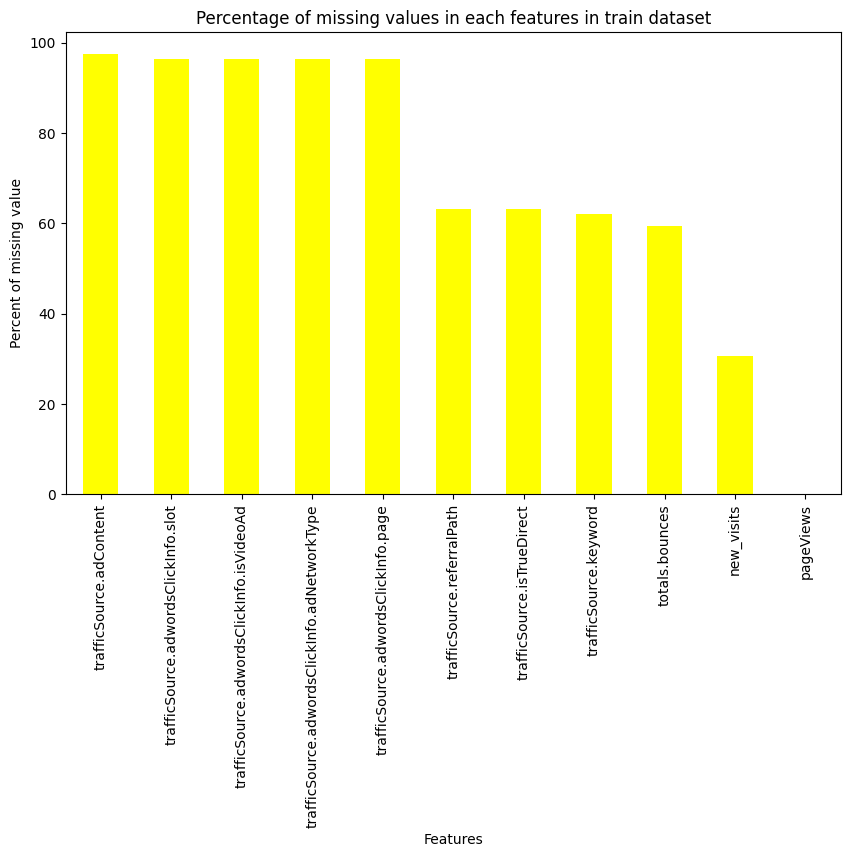

Feature column containing missing value and its percentage

trafficSource.adContent                         97.442718
trafficSource.adwordsClickInfo.slot             96.313058
trafficSource.adwordsClickInfo.isVideoAd        96.313058
trafficSource.adwordsClickInfo.adNetworkType    96.313058
trafficSource.adwordsClickInfo.page             96.313058
trafficSource.referralPath                      63.132303
trafficSource.isTrueDirect                      63.089984
trafficSource.keyword                           61.949096
totals.bounces                                  59.303721
new_visits                                      30.566471
pageViews                                        0.006909
dtype: float64


In [ ]:
# To get the percentage of missing values
null_pct = (X_train.isnull().sum() / len(X_train)) * 100

# Columns with missing values
null_pct = null_pct[null_pct > 0]
null_pct = null_pct.sort_values(ascending=False)

# bar plot
plt.figure(figsize=(10, 6))
null_pct.plot(kind='bar', color ='yellow')
plt.title('Percentage of missing values in each features in train dataset')
plt.xlabel('Features')
plt.ylabel('Percent of missing value')
plt.show()
print('\n')
display(Markdown("Feature column containing missing value and its percentage"))
print(null_pct)

* Some Feature Column in train data has higher number of missing values.The following feature columns: **trafficSource.adContent**,**trafficSource.adwordsClickInfo.slot**,**trafficSource.adwordsClickInfo.isVideoAd**,**trafficSource.adwordsClickInfo.adNetworkType**,**trafficSource.adwordsClickInfo.page** has more than 90% missing values.
* **trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.keyword,totals.bounces**, following feature column has more than 59% missing values.
* **new_visits** has more than 30% missing values.
* correlation value with between feature column with 90% missing value and  target variable should be considered before discarding feature column with missing values greater than 90%.
* Those feature column with more than 90% missing values is not helpful for model training even after imputation due to low variance.



# Column with more than 90% missing value

In [ ]:
high_null_val_col=null_pct[null_pct > 90]
display(Markdown("Column with more than 90% missing value "))
print(high_null_val_col)

Column with more than 90% missing value 

trafficSource.adContent                         97.442718
trafficSource.adwordsClickInfo.slot             96.313058
trafficSource.adwordsClickInfo.isVideoAd        96.313058
trafficSource.adwordsClickInfo.adNetworkType    96.313058
trafficSource.adwordsClickInfo.page             96.313058
dtype: float64


# Missing values in test data

In [ ]:
display(Markdown("Total missing values in each column in test data"))
missing_cols_test = X_test.isnull().sum().sort_values()
print(missing_cols_test)

Total missing values in each column in test data

userChannel                                         0
geoNetwork.networkLocation                          0
geoNetwork.region                                   0
geoNetwork.subContinent                             0
screenSize                                          0
totalHits                                           0
totals.visits                                       0
trafficSource.campaign                              0
geoNetwork.networkDomain                            0
trafficSource.medium                                0
sessionId                                           0
sessionNumber                                       0
sessionStart                                        0
userId                                              0
locationZone                                        0
geoCluster                                          0
browserMajor                                        0
trafficSource                                       0
geoNetwork.metro            

# Percentage of missing values in each features in test dataset

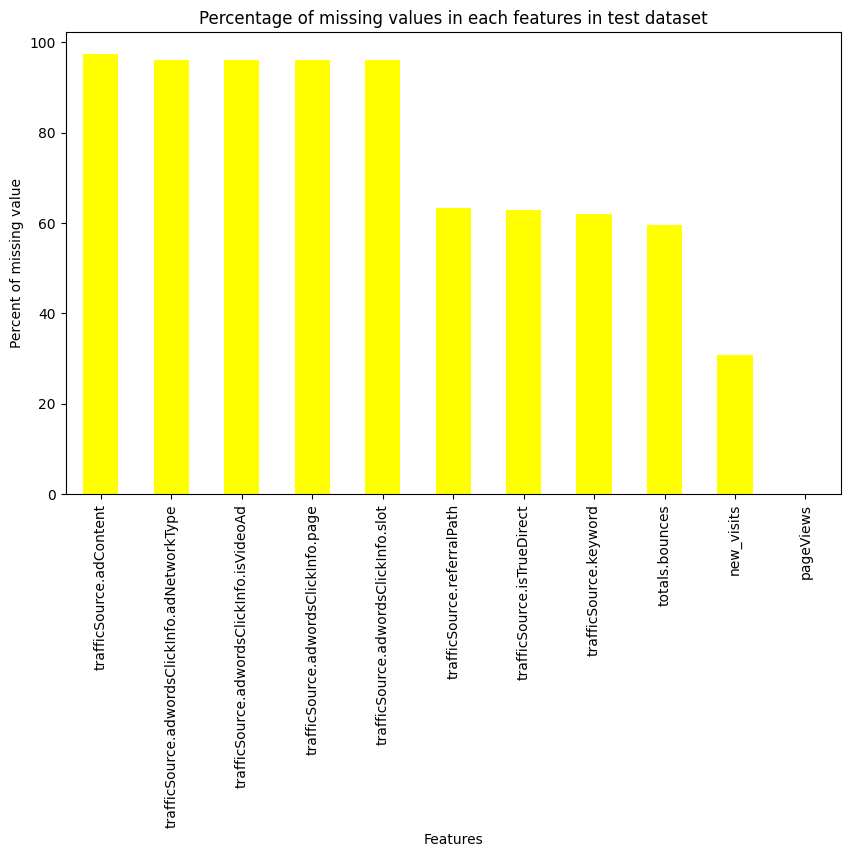

Feature column containing missing value and its percentage

trafficSource.adContent                         97.383300
trafficSource.adwordsClickInfo.adNetworkType    96.183548
trafficSource.adwordsClickInfo.isVideoAd        96.183548
trafficSource.adwordsClickInfo.page             96.183548
trafficSource.adwordsClickInfo.slot             96.183548
trafficSource.referralPath                      63.417914
trafficSource.isTrueDirect                      62.900779
trafficSource.keyword                           61.925119
totals.bounces                                  59.553196
new_visits                                      30.724678
pageViews                                        0.010343
dtype: float64


In [ ]:
# To get the percentage of missing values
null_pct_test = (X_test.isnull().sum() / len(X_test)) * 100

# Columns with missing values
null_pct_test = null_pct_test[null_pct_test > 0]
null_pct_test = null_pct_test.sort_values(ascending=False)

# bar plot
plt.figure(figsize=(10, 6))
null_pct_test.plot(kind='bar', color ='yellow')
plt.title('Percentage of missing values in each features in test dataset')
plt.xlabel('Features')
plt.ylabel('Percent of missing value')
plt.show()
print('\n')
display(Markdown("Feature column containing missing value and its percentage"))
print(null_pct_test)

* In both traing and test data set same feature Column has higher number of missing values.The following feature columns: **trafficSource.adContent**,**trafficSource.adwordsClickInfo.slot**,**trafficSource.adwordsClickInfo.isVideoAd**,**trafficSource.adwordsClickInfo.adNetworkType**,**trafficSource.adwordsClickInfo.page** has more than 90% missing values.
* **trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.keyword,totals.bounces**, following feature column has more than 59% missing values.
* **new_visits** has more than 30% missing values.
* correlation value with between feature column with 90% missing value and  target variable should be considered before discarding feature column with missing values greater than 90%.
* Columns with higher number of missing values are same for traing and test data set.



# Unique values in each Features

In [ ]:
display(Markdown("Total number of unique values in each feature columns"))
print(X_train.nunique(dropna=True).sort_values())

Total number of unique values in each feature columns

trafficSource.isTrueDirect                           1
device.screenColors                                  1
device.browserVersion                                1
device.language                                      1
totals.bounces                                       1
device.mobileDeviceModel                             1
locationZone                                         1
socialEngagementType                                 1
device.browserSize                                   1
browserMajor                                         1
trafficSource.adwordsClickInfo.isVideoAd             1
geoNetwork.networkLocation                           1
totals.visits                                        1
device.flashVersion                                  1
device.operatingSystemVersion                        1
new_visits                                           1
device.mobileDeviceMarketingName                     1
device.screenResolution                              1
screenSize

* A large number of feature column has only one unique value.
* Only **userId,sessionId,sessionStart** feture column has more than 100000 unique values which is almost equal to the total number of data point present in train data.Other feature column has less than 7000 unique values.

# Visualization of High cardinality columns

In [ ]:
display(Markdown("Top 11 high cardinality column"))
print(X_train.nunique(dropna=True).sort_values(ascending = False).head(11))

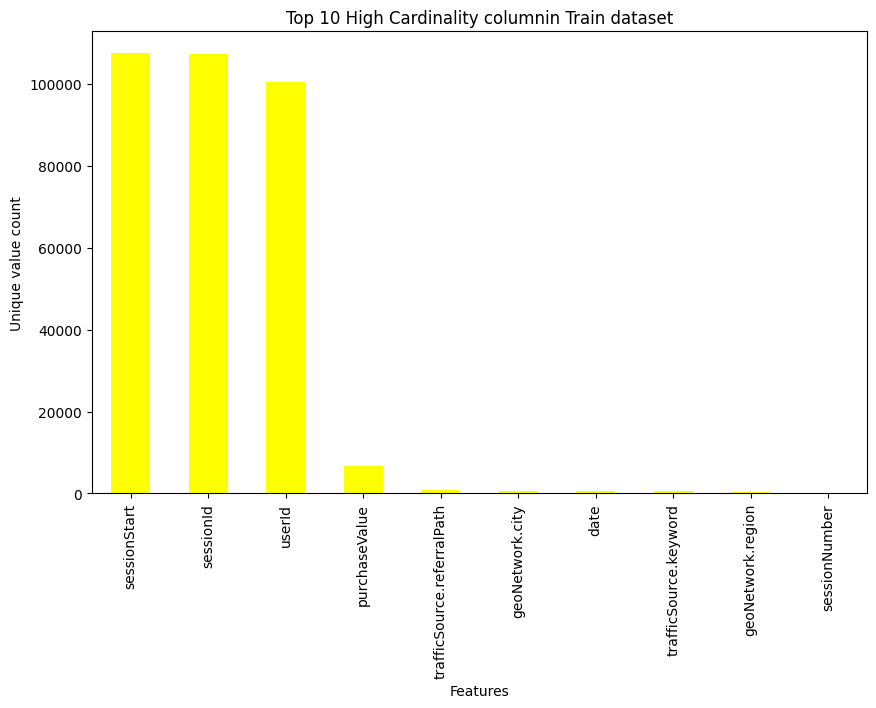

In [ ]:
# top 10 high cardinality col
high_card_col = X_train.nunique(dropna=True).sort_values(ascending = False).head(10)


# bar plot
plt.figure(figsize=(10, 6))
high_card_col.plot(kind='bar', color ='yellow')
plt.title('Top 10 High Cardinality columnin Train dataset')
plt.xlabel('Features')
plt.ylabel('Unique value count')
plt.show()

# Feature Column with one unique value

In [ ]:
uniq_val_col=[col for col in X_train.columns if X_train[col].nunique(dropna=True) == 1]
print("Total number of Columns with only one unique value = ",len(uniq_val_col))
display(Markdown("Feature Columns name with only one unique value"))
print(uniq_val_col)
display(Markdown("Only one Unique valued columns in train data "))

print(X_train[uniq_val_col])


Total number of Columns with only one unique value =  21


Feature Columns name with only one unique value

['trafficSource.isTrueDirect', 'device.screenResolution', 'screenSize', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'totals.visits', 'geoNetwork.networkLocation', 'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor', 'device.browserSize', 'socialEngagementType', 'locationZone', 'device.mobileDeviceModel', 'totals.bounces', 'device.language', 'device.browserVersion', 'device.screenColors', 'new_visits']


Only one Unique valued columns in train data 

       trafficSource.isTrueDirect        device.screenResolution screenSize  \
0                             NaN  not available in demo dataset     medium   
1                            True  not available in demo dataset     medium   
2                            True  not available in demo dataset     medium   
3                             NaN  not available in demo dataset     medium   
4                            True  not available in demo dataset     medium   
...                           ...                            ...        ...   
116018                        NaN  not available in demo dataset     medium   
116019                       True  not available in demo dataset     medium   
116020                       True  not available in demo dataset     medium   
116021                        NaN  not available in demo dataset     medium   
116022                       True  not available in demo dataset     medium   

          device.mobileDeviceBranding     device.mo

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


* **Conclusion** : Since Only one unique valued column has low variance,it does not help in model training.
* Discarding this only one unique valued columns before model traing is required for better model traing and evaluation.

# Separating Numerical columns and Categorical Columns

In [ ]:
Numerical_col=X_train.select_dtypes(include=['int64', 'float64'])
Categorical_col=X_train.select_dtypes(include=['object','bool'])

In [ ]:
#numerical columns
print('Total number of numerical columns ',Numerical_col.shape[1])
display(Markdown("Numerical Columns"))
print(Numerical_col.head(4))
#categorical columns
print('Total number of categorical columns =',Categorical_col.shape[1])
display(Markdown("Categorical Columns"))
print(Categorical_col.head(4))


Total number of numerical columns  14


Numerical Columns

   purchaseValue  userId  gclIdPresent  sessionNumber  totals.visits  \
0            0.0   61421             0              1              1   
1            0.0   72287             0              1              1   
2            0.0   25180             0              2              1   
3            0.0   41295             0              1              1   

    sessionId  trafficSource.adwordsClickInfo.page  pageViews  locationZone  \
0  1500100799                                  NaN        1.0             8   
1  1495262065                                  NaN        1.0             8   
2  1508510328                                  NaN        6.0             8   
3  1483431838                                  NaN        1.0             8   

   totals.bounces      date  totalHits  sessionStart  new_visits  
0             1.0  20170714          1    1500100799         1.0  
1             1.0  20170519          1    1495262065         1.0  
2             NaN  20171020          6    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Categorical Columns

  trafficSource.isTrueDirect            browser  \
0                        NaN               Edge   
1                       True             Chrome   
2                       True             Chrome   
3                        NaN  Internet Explorer   

         device.screenResolution trafficSource.adContent  \
0  not available in demo dataset                     NaN   
1  not available in demo dataset                     NaN   
2  not available in demo dataset                     NaN   
3  not available in demo dataset                     NaN   

  trafficSource.keyword screenSize geoCluster  \
0                   NaN     medium   Region_2   
1                   NaN     medium   Region_3   
2        (not provided)     medium   Region_2   
3                   NaN     medium   Region_4   

  trafficSource.adwordsClickInfo.slot    device.mobileDeviceBranding  \
0                                 NaN  not available in demo dataset   
1                                 NaN  not available 

* In this dataset,14 Numerical columns and 38 Categorical columns present.
* The dataset has more than twice number of Categorical columns than Numerical Columns.

In [ ]:
display(Markdown("Summary Statistics of Numerical Columns"))
print(Numerical_col.describe().T)


Summary Statistics of Numerical Columns

                                        count          mean           std  \
purchaseValue                        115787.0  2.642244e+07  2.051726e+08   
userId                               115787.0  6.109635e+04  3.524026e+04   
gclIdPresent                         115787.0  3.699034e-02  1.887389e-01   
sessionNumber                        115787.0  2.691805e+00  1.046161e+01   
totals.visits                        115787.0  1.000000e+00  0.000000e+00   
sessionId                            115787.0  1.493441e+09  1.529498e+07   
trafficSource.adwordsClickInfo.page    4269.0  1.019677e+00  1.747586e-01   
pageViews                            115779.0  8.381330e+00  1.429976e+01   
locationZone                         115787.0  8.000000e+00  0.000000e+00   
totals.bounces                        47121.0  1.000000e+00  0.000000e+00   
date                                 115787.0  2.016860e+07  6.184992e+03   
totalHits                            115787.0  1.056594e+01  1.955884e+01   

In [ ]:
display(Markdown("Summary Statistics of Categorical Columns"))
print(Categorical_col.describe().T)

Summary Statistics of Categorical Columns

                                               count unique  \
trafficSource.isTrueDirect                     42737      1   
browser                                       115787     34   
device.screenResolution                       115787      1   
trafficSource.adContent                         2961     53   
trafficSource.keyword                          44058    566   
screenSize                                    115787      1   
geoCluster                                    115787      5   
trafficSource.adwordsClickInfo.slot             4269      3   
device.mobileDeviceBranding                   115787      1   
device.mobileInputSelector                    115787      1   
trafficSource.campaign                        115787     28   
device.mobileDeviceMarketingName              115787      1   
geoNetwork.networkDomain                      115787      3   
device.operatingSystemVersion                 115787      1   
device.flashVersion                           115787   

# Target Variable Visualization

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


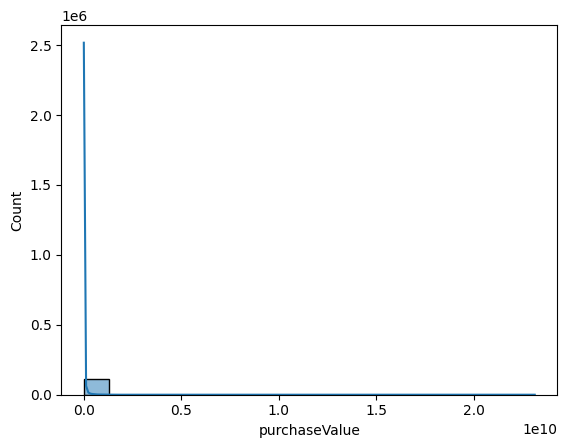

target variable is Right-skewed

In [ ]:
target='purchaseValue'
sns.histplot(X_train[target], kde=True)
#sns.histplot(X_train[target], kde=False)

plt.show()
display(Markdown("target variable is Right-skewed"))


* **Conclussion**:Here target variable is Right skewed distribution.
* It has mode=0, indicates most people do not make any purchase.

# Buyer and Non-Buyer user proportion in train data

In [ ]:
# to dectect non-buyers
non_buyer_count = (X_train['purchaseValue'] == 0).sum()

print("Total zero-purchase count:", non_buyer_count)
# to detect buyers
buyer_count = (X_train['purchaseValue'] > 0).sum()
#total data point
i = len(X_train)

print("Total Non-zero purchase count:", buyer_count)
print("Percentage of zero-purchase in train data:", (non_buyer_count/i) *100)
print("Percentage of non-zero-purchase in train data:", (buyer_count/i) *100)
#print(i)


Total zero-purchase count: 91990
Total Non-zero purchase count: 23797
Percentage of zero-purchase in train data: 79.44760638068176
Percentage of non-zero-purchase in train data: 20.55239361931823


**Conclusion**:
* Percentage of zero-purchase in train data is 79.45.
* It indicates more than 79% of the training data point contain only non- buyer users.
* 4 out of 5 part of training data belong to non-buyer user.
* Percentage of non-zero-purchase in train data is  20.55
* It indicates only 20.5% of the training data belong to buyer users.
* 1 out of 5 part of training data belong to buyer user.

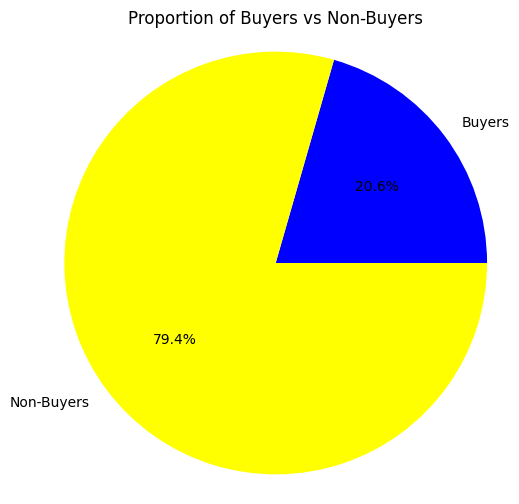

In [ ]:
# Labels and sizes
labels = ['Buyers', 'Non-Buyers']
sizes = [buyer_count, non_buyer_count]
colors = ['blue','yellow']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')
plt.title('Proportion of Buyers vs Non-Buyers')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()

# Outlier Detection

In [ ]:
# numerical columns excluding purchaseValue
num_cols = X_train.select_dtypes(include=['int64','float64']).drop(columns=['purchaseValue']).columns

# first (Q1) and third quartile (Q3) computation
q1 = X_train[num_cols].quantile(0.25)
q3= X_train[num_cols].quantile(0.75)

# Interquartile Range Computation(IQR)
iqr = q3 - q1

#outliers detection after (1.5 * IQR) range
outliers= (X_train[num_cols] < (q1 - 1.5 * iqr) | (X_train[num_cols] > (q3 + 1.5 * iqr)))

# Total number of outliers and its percentage computate
outlier_count = outliers.sum().sum()
data_pt_count = X_train.size
outlier_pct = ( outlier_count/ data_pt_count) * 100   # Compute overall outlier percentage

# outlier percentage feture wise computation
outlier_counts_feature = outliers.sum()
outlier_feature_pct = (outlier_counts_feature / len(X_train)) * 100

# sorting features by outlier percentage
outlier_features_sorted = outlier_feature_pct.sort_values()

print(f"Total Outlier Percentage: {outlier_pct:.6f}%\n")
print("Outlier Percentage Feature Column wise:\n")
print(outlier_features_sorted)
display(Markdown("Training dataset has no outliers."))

Total Outlier Percentage: 0.000017%

Outlier Percentage Feature Column wise:

gclIdPresent                           0.000000
sessionNumber                          0.000000
totals.visits                          0.000000
sessionId                              0.000000
trafficSource.adwordsClickInfo.page    0.000000
pageViews                              0.000000
locationZone                           0.000000
totals.bounces                         0.000000
date                                   0.000000
totalHits                              0.000000
sessionStart                           0.000000
new_visits                             0.000000
userId                                 0.000864
dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


Training dataset has no outliers.

# Correlation between target variable and numerical column

* Strongly correlated numerical feature with target variable helps in better model traing.

In [ ]:
# Compute correlation with the target variable
corr_with_target = Numerical_col.corr()["purchaseValue"].abs().sort_values(ascending=False)
print(corr_with_target)

purchaseValue                          1.000000
totalHits                              0.251095
pageViews                              0.247827
sessionNumber                          0.230761
trafficSource.adwordsClickInfo.page    0.025661
sessionId                              0.018314
sessionStart                           0.018314
date                                   0.010221
gclIdPresent                           0.005675
userId                                 0.003501
totals.visits                               NaN
locationZone                                NaN
totals.bounces                              NaN
new_visits                                  NaN
Name: purchaseValue, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


**Conclusion**:
* 1. Correlation between target variable  and numerical columns is not significant.
*  2. totalHits and target variable has highest correlation value  which is 0.25, which indicates both variable are not strongly correlated.
* 3. totals.visits,locationZone,totals.bounces,new_visits fetures column has only one unique value so this features has no correlation with target variable.

# Correlation Heatmap between numerical Feature and target variable

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


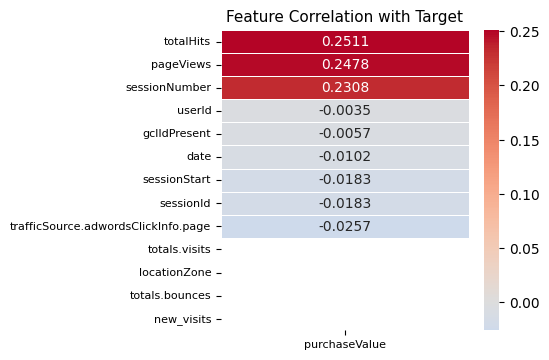

In [ ]:
# correlation of all numerical features with target
corr_target = Numerical_col.corr()["purchaseValue"].drop("purchaseValue")
# Convert to DataFrame for seaborn heatmap
corr_target_df = corr_target.to_frame().sort_values(by="purchaseValue", ascending=False)
plt.figure(figsize=(4, len(corr_target_df) * 0.3))

sns.heatmap(corr_target_df, cmap="coolwarm",fmt=".4f", linewidths=0.5,center=0 ,annot=True)

plt.title("Feature Correlation with Target", fontsize=11)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

* **Observations from correlation analysis with the target variable**:

  1. **weakly correlated feature**: No feature variable in the data set is strongly correlated with target variable.This indicates numerous feature variable has impacts on target variable.
   2. **totalHits,pageViews,sessionNumber**  these feature has the maximum correlation value with respect to target variable,which is greater 0.2.This indicates significant correalation between target varaiable and this numerical features.

   3. **totalHits(0.2511),pageViews(0.2478),sessionNumber(0.2308)** has the highest  correlation value,this indicates total number of pages clicked by user in a session, total number of pages viewed by user in a seesion and total number of session of a user effects a user's purchase amount.

* **Conclusion**:Number of pages viewed,clicked by a user and number of session of a user affects a user purchase value. A more detail oriented feature selection required to improve models predectivity.

# Highly Correlated Numerical Features


In [ ]:
# Compute correlation matrix
corr_matrix = Numerical_col.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > threshold (e.g., 0.8)
threshold = 0.8
high_corr_pairs = [
    (col, row, corr_matrix.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if upper.loc[row, col] > threshold
]

# Display highly correlated pairs
print("Highly Correlated Pairs (|correlation| > 0.8):")
for col1, col2, corr in high_corr_pairs:
    print(f"{col1} - {col2}: {corr:.2f}")


Highly Correlated Pairs (|correlation| > 0.8):
date - sessionId: 0.91
totalHits - pageViews: 0.99
sessionStart - sessionId: 1.00
sessionStart - date: 0.91


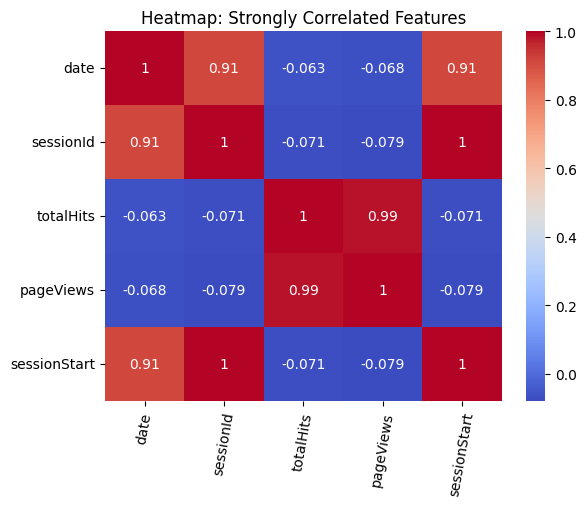

Correlation between highly correlated fetures and the target variable:
date           -0.010221
sessionId      -0.018314
totalHits       0.251095
pageViews       0.247827
sessionStart   -0.018314
dtype: float64


In [ ]:
features=Numerical_col[['date', 'sessionId','totalHits','pageViews', 'sessionStart']]
sns.heatmap(features.corr(), annot =  True, cmap = 'coolwarm')
plt.xticks(rotation=80)
plt.title("Heatmap: Strongly Correlated Features")
plt.show()

# Correlation of these features with the target variable
corr_with_target = X_train[['date', 'sessionId','totalHits','pageViews', 'sessionStart']].corrwith(X_train["purchaseValue"])
print("Correlation between highly correlated fetures and the target variable:")
print(corr_with_target)

* **Conclussion**:
* **date and sessionId** feature column is strongly correlated( 0.91).But with target variable **date(-0.010) and sessionID(-0.018)** not strongly correlated.
* **totalHits and pageViews** feature column is strongly correlated(0.99) and with target variable **totalHits(0.251) and pageViews (0.247)**  are significantly correlated.
* **sessionStart and sessionId** feature column is strongly correlated( 1.00).But with target variable **sessionStart( -0.018) and sessionID(-0.018)** not strongly correlated.
* **sessionStart and date** feature column is strongly correlated( 0.91).But with target variable **date( -0.010) and sessionStart( -0.018)** not strongly correlated.

# Feature Analysis
# Univariate analysis on numerical features


**Univariate analysis of Numerical Features**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

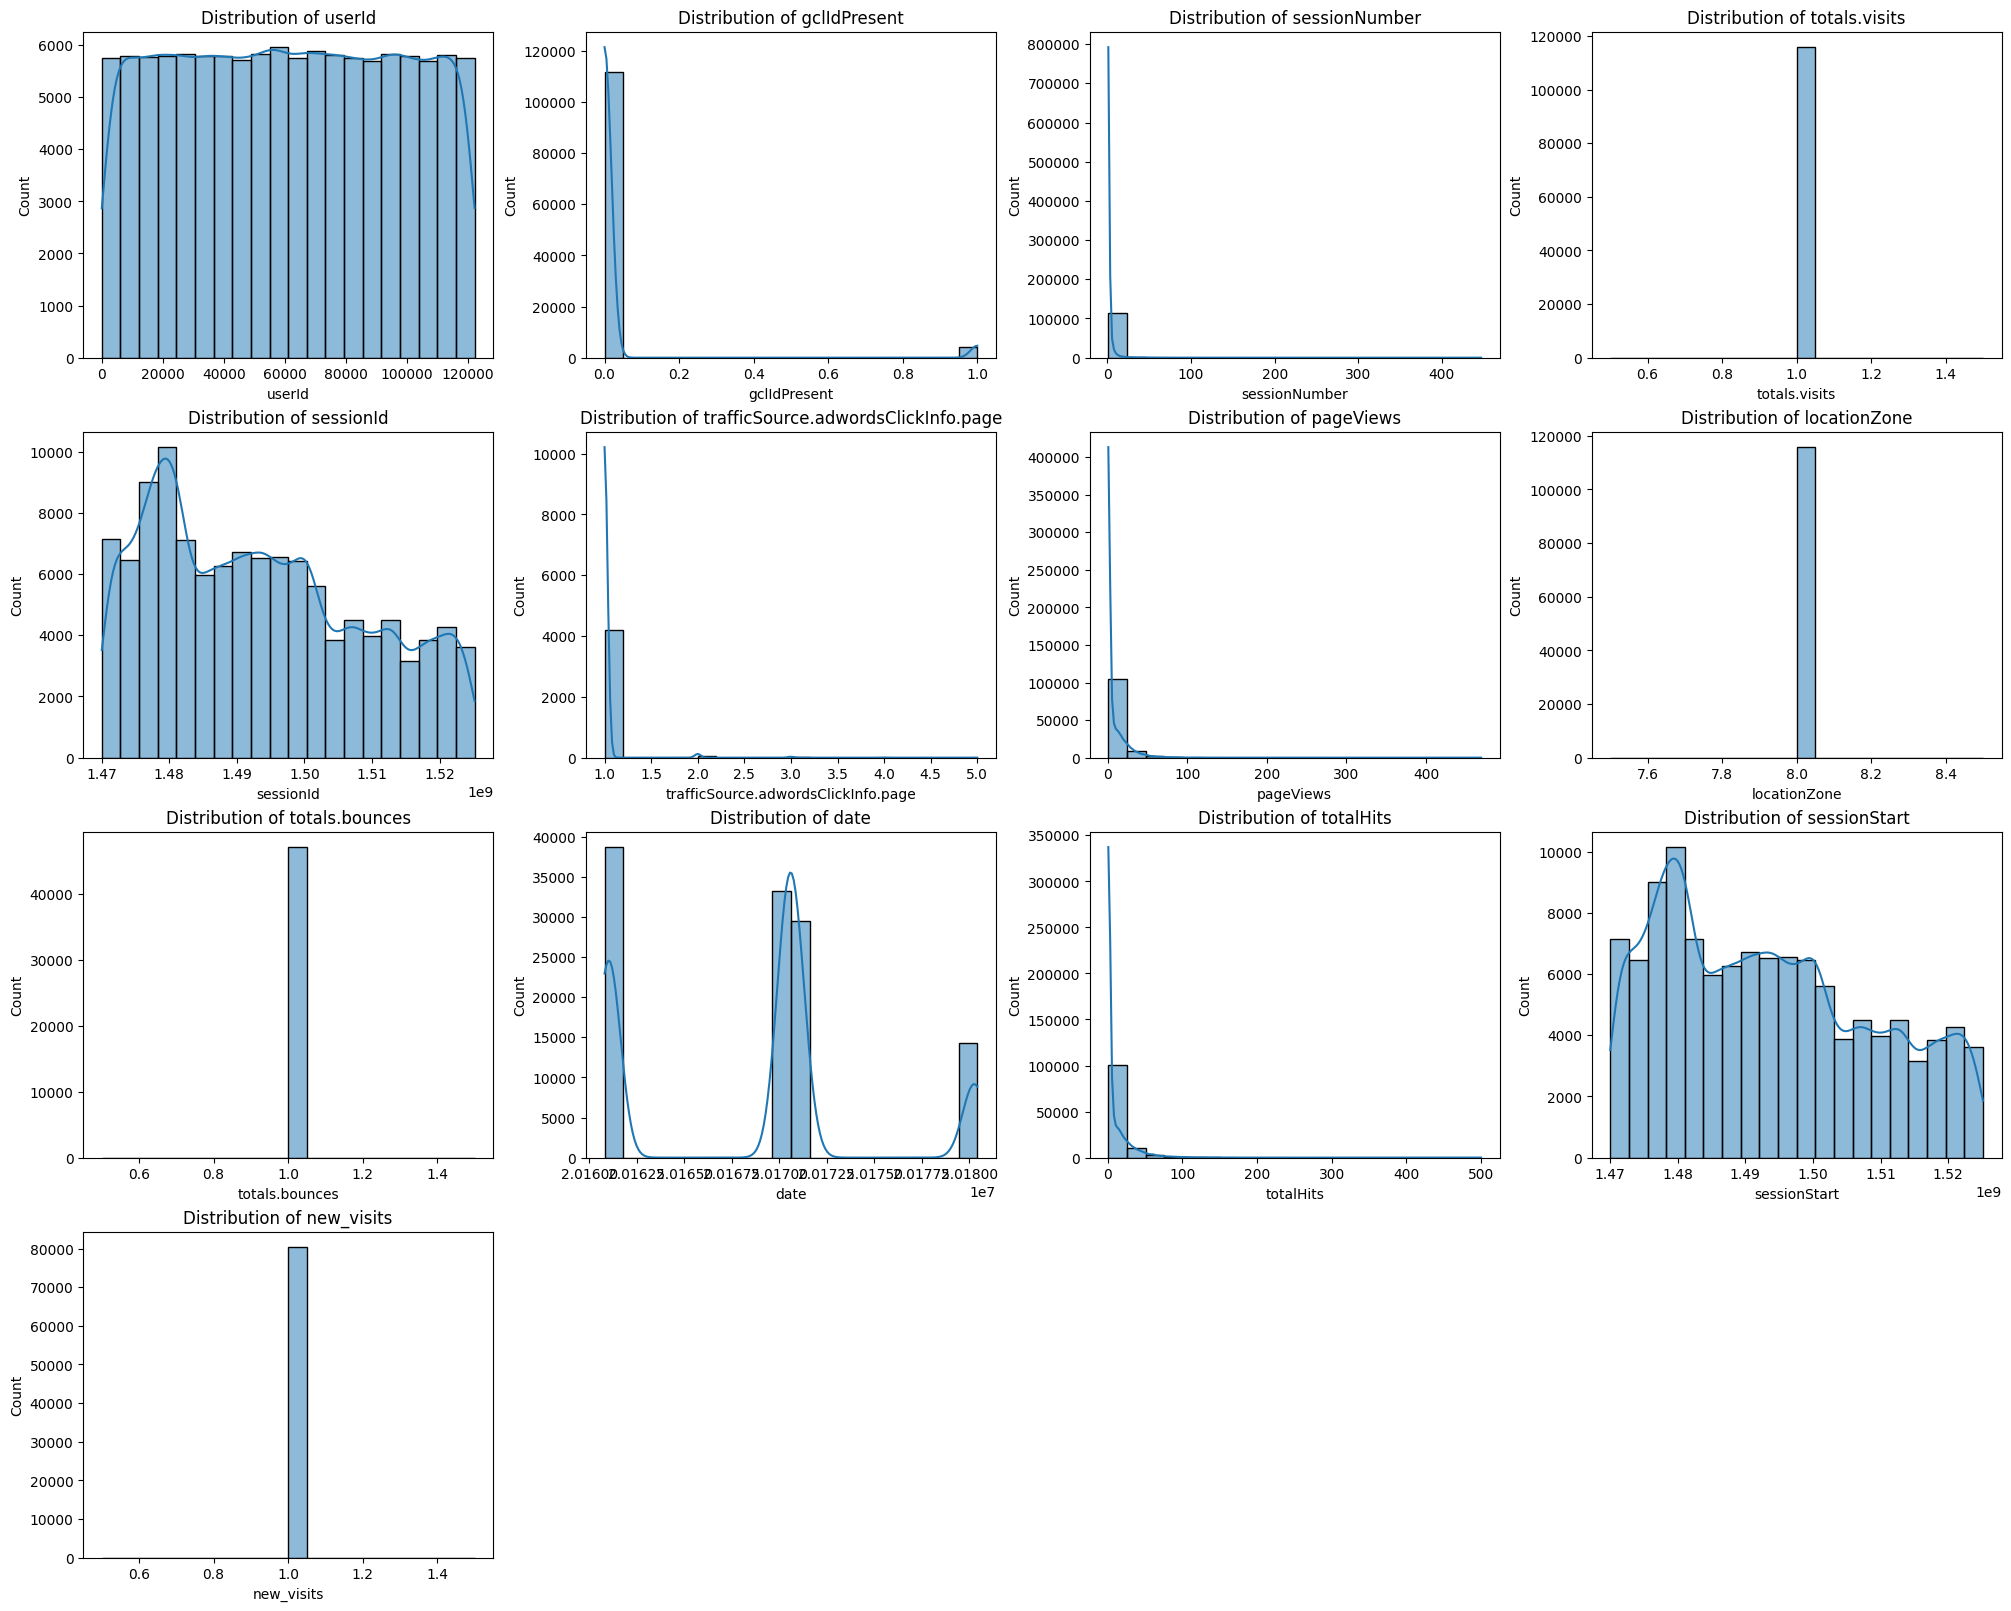

In [ ]:
display(Markdown("**Univariate analysis of Numerical Features**"))
#numerical features excluding the target variable
num_feat = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
num_feat.remove('purchaseValue')  # target discared

# correlation of each feature with the target
correlations = X_train[num_feat + ['purchaseValue']].corr()['purchaseValue'].drop('purchaseValue')

# subplot grid set up
cols = 4
rows = math.ceil(len(num_feat) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), constrained_layout=True)
axes = axes.flatten()

# KDE(kernel density estimation) for smooth density curve,no of bars= 20
for i, col in enumerate(num_feat):
    sns.histplot(X_train[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")


# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


# Insights from the graphs

* **1.Partially balanced Distribution: userId** feature has balanced distribution. While **sessionId,sessionstart,date** shows some imbalance due to multiple peaks.,**sessionId,sessionstart,date** features are partially balanced.
* **2.Right-skewed Features: gclIdPresent,sessionNumber,trafficSource.adwordsClickInfo.page,pageViews,totalHits** features are right-skewed. This indicates negatively skewed . Most features has small values but have a long tail.
* **3.Not-skewed: new_visits,totals.visits,locationZone,totals.bounces** has no skewness due to havong only one unique value.

# Categorical Feature Analysis
* Categorical columns with less than or equal to 10 unique values and greater than 1 unique value are selected for analysis due to easy visualization, and comparition against the target variable.


In [ ]:
selected_cat_feat = [col for col in X_train.select_dtypes(include=["object", "bool"])
                       if ((X_train[col].nunique() <= 10) and ((X_train[col].nunique() > 1))) ]
print(selected_cat_feat)
X_train[selected_cat_feat].nunique()

['geoCluster', 'trafficSource.adwordsClickInfo.slot', 'geoNetwork.networkDomain', 'trafficSource.medium', 'trafficSource.adwordsClickInfo.adNetworkType', 'deviceType', 'userChannel', 'geoNetwork.continent', 'device.isMobile']


geoCluster                                      5
trafficSource.adwordsClickInfo.slot             3
geoNetwork.networkDomain                        3
trafficSource.medium                            7
trafficSource.adwordsClickInfo.adNetworkType    2
deviceType                                      3
userChannel                                     8
geoNetwork.continent                            6
device.isMobile                                 2
dtype: int64

# Univariate analysis on Categorical features

**Univariate analysis : Categorical Features**

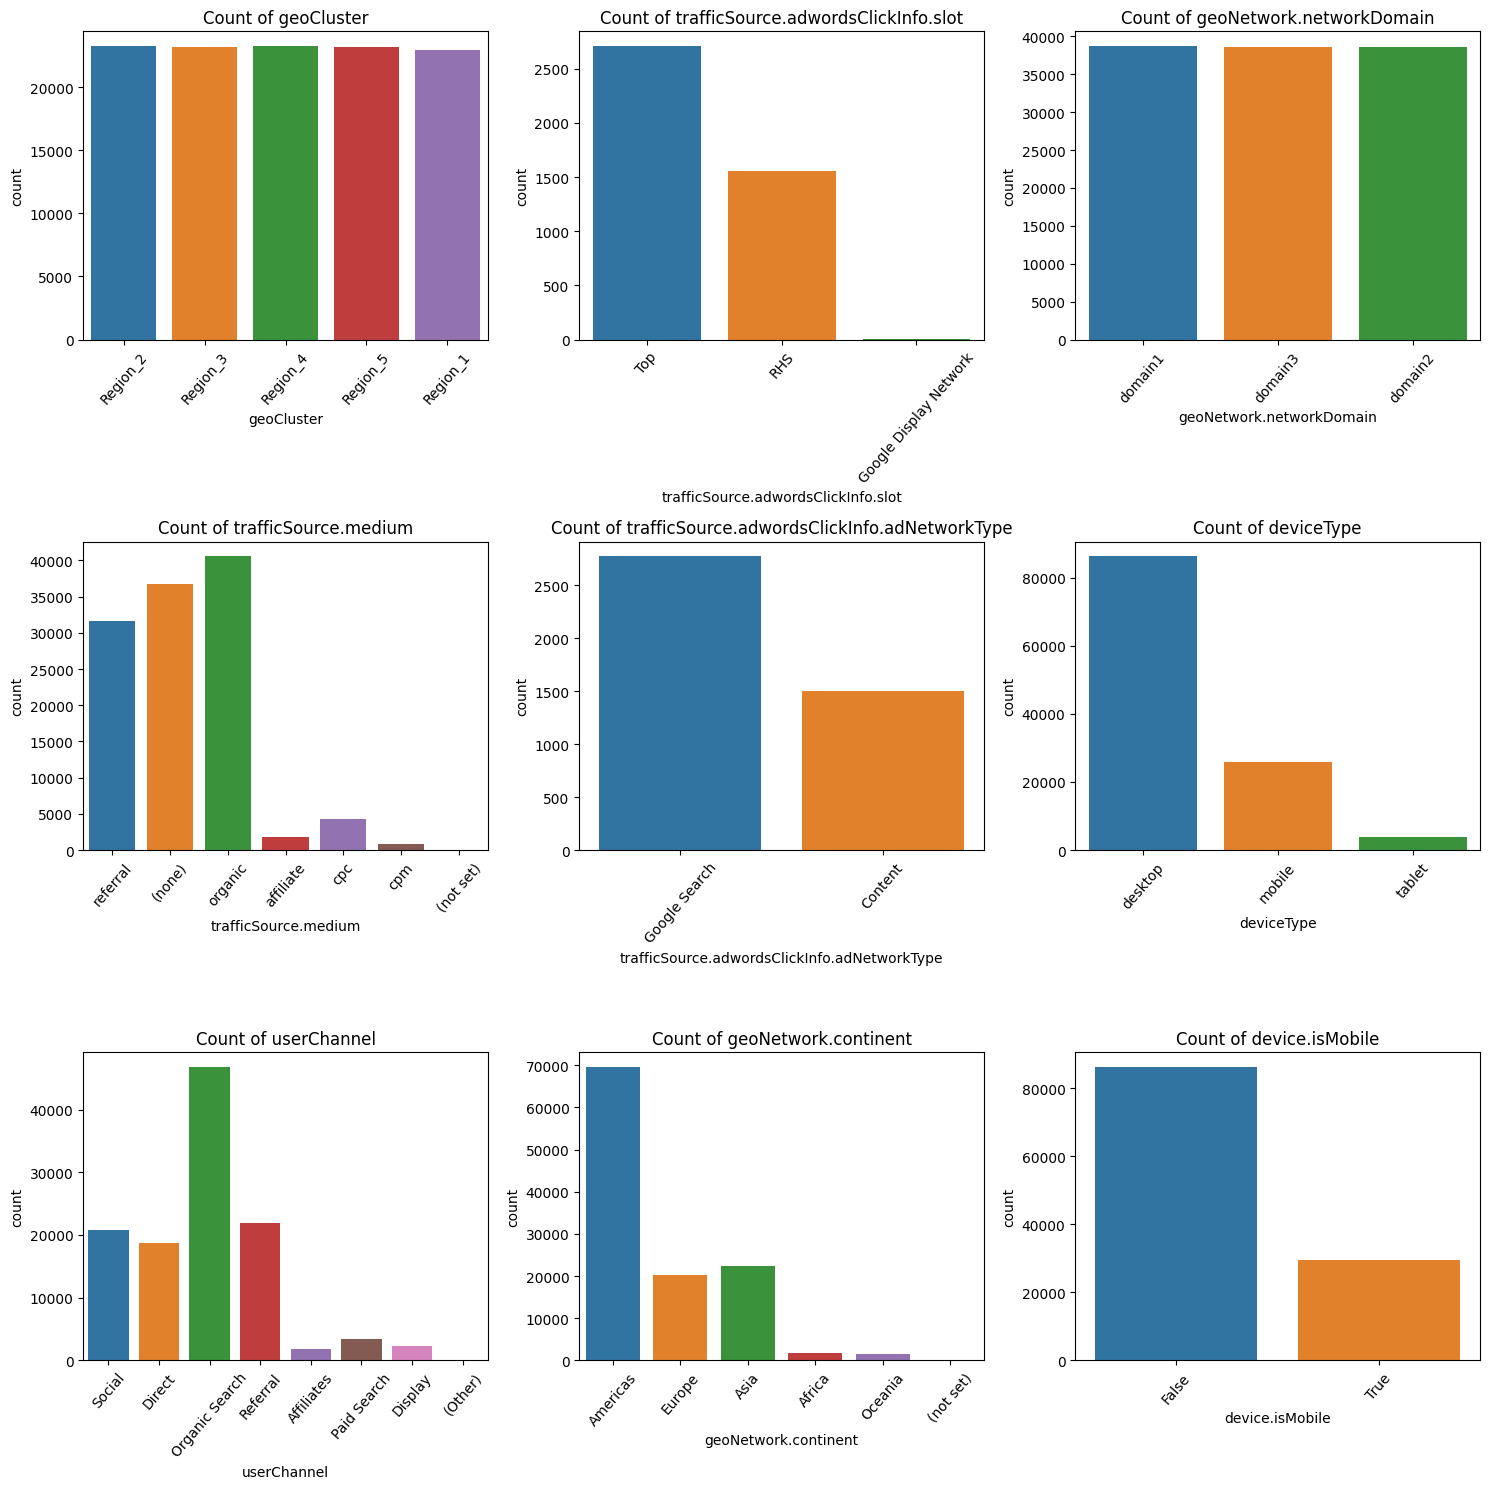

In [ ]:
display(Markdown("**Univariate analysis : Categorical Features**"))

# number of rows and columns
cat_feat = len(selected_cat_feat)
cols = 3
rows = math.ceil(cat_feat / cols)

# subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()  #for easy iteration
# Ploting categorical features
for i, col in enumerate(selected_cat_feat):
    sns.countplot(data=X_train, x=col, ax=axes[i])
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis='x', rotation=49)

# Remove empty subplots (if any)
for i in range(cat_feat, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Insights from the above graphs
* **1.geocluster:** It has a balanced distribution.'Region_1','Region_2','Region_3','Region_4','Region_5' has same count value, which indicates all of them has occured nearly same number times in training data.
* **2.trafficSource.adwordsClickInfo.slot:**'Top' is dominant here having much higher value than 'RHS'.
* **3.geoNetwork.networkDomain:** It shows balanced distribution.'domain1','domain2','domain3'has same count value.
* **4.trafficSource.medium:**'organic' dominates here following by 'none'.This indicates most user came here by their own.'referral' also has a significant count. But 'cpm' and 'referral' has significantly lowest count.
* **5.trafficSource.adwordsClickInfo.adNetworkType:**'Google Search' dominates here. Most user probably used Google serch engine.'content' has a significantly good count too.
* **6.deviceType:**'desktop has highest count, indicating most user uses a desktop computer while purchasing.'mobile' and 'tablet' has significant count also.
* **7.userChannel:**'organic Search' has the highest count here.'Social','Direct' and 'Referral' has good number of count value.'Paid Search',Affiliates'has notablely low count value.while '(other)' has the lowest count value.
* **8.geoNetwork.continent:**'Americas; dominates here. 'Europe'and 'Asia' has significant number of counts too. 'Africa' and 'Oceania' has significantly low count numbers.Where as '(not set)' has least count.
* **9.device.isMobile:**'False' dominates here.

* **conclussion:**
* **1. Imbalaced Distribution:trafficSource.adwordsClickInfo.slot, trafficSource.medium, trafficSource.adwordsClickInfo.adNetworkType, deviceType, userChannel, geoNetwork.continent, device.isMobile**, following features has significantly imbalanced distribution.
* **2. Balanced Distribution:geocluster,geoNetwork.networkDomain** both features has balanced distribution.

# Feature Engineering

* Feature columns required to drop
1. Low variance feature column: Feature column with only one unique value.This feature column has no correlation with target variable , so both discarded from train and test dataset


In [ ]:
#1.Low variance feature column
drop_cols = [col for col in X_train.columns if X_train[col].nunique(dropna=True) == 1]
X_train = X_train.drop(columns=drop_cols)

# Apply same columns drop to test data
X_test = X_test.drop(columns=drop_cols)


# Data Preprocessing

# Splitting feature and target data

In [ ]:
X = X_train.drop("purchaseValue", axis=1)
y = X_train['purchaseValue']

# Importing required Libraries for data preprocessing and model training

In [ ]:
#importing required class for pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import category_encoders as ce
#
from sklearn.model_selection import train_test_split
#
#importing requied class for model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#
#importing required class for models
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Train and Validation data Split
* (x_train,y_train) is the trainig dataset.
* (x_valid, y_valid) is validation dataset.

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# dividing  numerical and categorical column for further computation
num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = x_train.select_dtypes(include=['object', 'bool']).columns.tolist()

#diving high cardinal and low cardinal categorical columns
high_card_cols = [col for col in cat_cols if x_train[col].nunique(dropna=True) > 10]
low_card_cols  = [col for col in cat_cols if x_train[col].nunique(dropna=True) <= 10]

# Defining Transformers
#for numerical column
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
#for low cardinality categorical column
low_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

#for high cardinality categorical column

high_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target', ce.TargetEncoder())
])

# Combining  all transformation into ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('low_cat', low_card_transformer, low_card_cols),
    ('high_cat', high_card_transformer, high_card_cols)
])


* For handling missing values in both numerical and categorical column SimpleImputer is used.
* For numerical column,used strategy="mean",it replaces missing value with mean value of each numerical column respectively.
* For categorical column,used strategy="mode",it replaces missing value with most ferquent value of each categorical column respectively
* For categorical fetures with low cardinality (less than or equal to 10 unique values in feature column), One-Hot Encoding is used to convert categorical variables into a numerical format that machine learning models can understand.
* One-Hot Encoding creates binary columns for each unique category in a feature. For each row, it places a 1 in the column corresponding to its category and 0 in all others.
* Target Encoding is used for high cardinality categorical variables (i.e. categorical feature column with more than 10 unique values) into numerical values using the mean of the target variable for each category.For each category, it replace with the average value of the target variable for that category.
* StandardScaler,preprocessing technique is used to standardize numerical features by removing the mean and scaling to unit variance.So for each scaled numerical feature column mean becames 0 and standard deviation 1.

# Model Training

# Model 1. XGBRegressor
* XGBRegressor is an efficient regression model for structured data. It is good at  handling of non-linear relationships and reduce overfitting.

In [ ]:
#model building using pipeline
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])
#prediction on training data
xgb_model.fit(x_train, y_train)
#prediction on validation data
y_xgb = xgb_model.predict(x_train)
y_pred_xgb = xgb_model.predict(x_valid)

#Evaluate
display(Markdown("XGBoost Model Evaluation"))

display(Markdown("on training data"))


print("RMSE on training data:", mean_squared_error(y_train, y_xgb, squared=False))
print("MAE on training data,", mean_absolute_error(y_train, y_xgb))
print("R² Score on training data:", r2_score(y_train, y_xgb))
print('\n')

display(Markdown("on validation data"))

print("RMSE on validation data:", mean_squared_error(y_valid, y_pred_xgb, squared=False))
print("MAE on validation data,", mean_absolute_error(y_valid, y_pred_xgb))
print("R² Score on validation data:", r2_score(y_valid, y_pred_xgb))


XGBoost Model Evaluation

on training data

RMSE on training data: 99279419.20076601
MAE on training data, 21534650.062351454
R² Score on training data: 0.7454277464842258




on validation data

RMSE on validation data: 210583630.10236868
MAE on validation data, 26389377.305589255
R² Score on validation data: 0.20247612966012218


* **Conclusion**: After training data with XGBRegressor
* R² Score on training data: 0.745(aprrox)
* R² Score on validation data: 0.202(approx)


# Hyper parameter tuning :XGBRegressor

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

#XGBoost pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, objective='reg:squarederror'))
])
# Parameter distribution for RandomizedSearchCV
param_dist = {
    'regressor__n_estimators': randint(200, 1000),
    'regressor__learning_rate': uniform(0.01, 0.2),
    'regressor__max_depth': randint(3, 10),
    'regressor__min_child_weight': randint(1, 10),
    'regressor__subsample': uniform(0.6, 0.4),
    'regressor__colsample_bytree': uniform(0.6, 0.4),
    'regressor__gamma': uniform(0, 0.3),
    'regressor__reg_alpha': uniform(0, 1),
    'regressor__reg_lambda': uniform(1, 2)
}
# RandomizedSearchCV for hpt
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=40,  # Number of different combinations to try
    scoring='r2',
    cv=3, # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1# # Use all available CPU cores
)

# model traing using training data
random_search_xgb.fit(x_train, y_train)

# Predict and evaluate
best_xgb_model = random_search_xgb.best_estimator_
y_xgb_hpt = best_xgb_model.predict(x_valid)

print("\n")
display(Markdown("Hyper-parameter-tuned XGBoost Regressor"))
print("Best Parametrs:", random_search_xgb.best_params_)
print("R² Score:", r2_score(y_valid, y_xgb_hpt))

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END regressor__colsample_bytree=0.7334834444556088, regressor__gamma=0.04286004537658223, regressor__learning_rate=0.14017769458977059, regressor__max_depth=7, regressor__min_child_weight=2, regressor__n_estimators=543, regressor__reg_alpha=0.8324426408004217, regressor__reg_lambda=1.4246782213565523, regressor__subsample=0.6727299868828402; total time=  14.7s
[CV] END regressor__colsample_bytree=0.7334834444556088, regressor__gamma=0.04286004537658223, regressor__learning_rate=0.14017769458977059, regressor__max_depth=7, regressor__min_child_weight=2, regressor__n_estimators=543, regressor__reg_alpha=0.8324426408004217, regressor__reg_lambda=1.4246782213565523, regressor__subsample=0.6727299868828402; total time=  14.2s
[CV] END regressor__colsample_bytree=0.6733618039413735, regressor__gamma=0.09127267288786131, regressor__learning_rate=0.11495128632644756, regressor__max_depth=6, regressor__min_child_weight=9, regres

Hyper-parameter-tuned XGBoost Regressor

Best Parametrs: {'regressor__colsample_bytree': 0.6835674870461441, 'regressor__gamma': 0.20134305504721517, 'regressor__learning_rate': 0.08172935625923278, 'regressor__max_depth': 9, 'regressor__min_child_weight': 2, 'regressor__n_estimators': 984, 'regressor__reg_alpha': 0.8486697949246744, 'regressor__reg_lambda': 1.2732426628840576, 'regressor__subsample': 0.8835643987640474}
R² Score: 0.27532759093934756


* **Conclusion**:On Validation set, R² value is 0.275(approx) after hyper parameter tuning.
* **Best Parametrs**: 'regressor__colsample_bytree': 0.6835674870461441, 'regressor__gamma': 0.20134305504721517, 'regressor__learning_rate': 0.08172935625923278, 'regressor__max_depth': 9, 'regressor__min_child_weight': 2, 'regressor__n_estimators': 984, 'regressor__reg_alpha': 0.8486697949246744, 'regressor__reg_lambda': 1.2732426628840576, 'regressor__subsample': 0.8835643987640474}


# Model 2.RandomForestRegressor
* RandomForestRegressor is good at handling non-linear data,resistant to overfitting and performs well even with noisy data and outliers.


In [ ]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=5, random_state=42))
])
#model training
rf_model.fit(x_train, y_train)

# prediction on training data
y_rf = rf_model.predict(x_train)

#prediction on validation data
y_pred_rf = rf_model.predict(x_valid)

#Evaluate
display(Markdown("RandomForestRegressor model Evaluation"))

display(Markdown("on training data"))
print("RMSE on training data:", mean_squared_error(y_train, y_rf, squared=False))
print("MAE on training data,", mean_absolute_error(y_train, y_rf))
print("R² Score on training data:", r2_score(y_train, y_rf))
print('\n')

display(Markdown("on validation data"))

print("RMSE on validation data:", mean_squared_error(y_valid, y_pred_rf, squared=False))
print("MAE on validation data,", mean_absolute_error(y_valid, y_pred_rf))
print("R² Score on validation data:", r2_score(y_valid, y_pred_rf))


RandomForestRegressor model Evaluation

on training data

RMSE on training data: 82282471.8859785
MAE on training data, 10017136.317999763
R² Score on training data: 0.8251332367025125




on validation data

RMSE on validation data: 208582233.0337859
MAE on validation data, 25989378.96191381
R² Score on validation data: 0.21756350311921857


* **Conclusion**: After training data with Random-ForestRegressor
* R² Score on training data: 0.825(aprrox)
* R² Score on validation data: 0.217(approx)


# Hyper parameter tuning:RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define parameter grid
param_grid = {
    'regressor__n_estimators': [10, 20],
    'regressor__max_depth': [None, 3],
    'regressor__min_samples_split': [2,3],
    'regressor__min_samples_leaf': [1, 2]
}

#Grid search
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# model training
grid_search.fit(x_train, y_train)

# Prediction on validation data
y_pred_rfh = grid_search.predict(x_valid)
#Model Evaluation Validation data
display(Markdown("Hyper-parameter-tuned Random-Forest Regressor"))
print("Best Params:", grid_search.best_params_)
print("R² Score:", r2_score(y_valid, y_pred_rfh))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


Hyper-parameter-tuned Random-Forest Regressor

Best Params: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 20}
R² Score: 0.2632810093491321
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=1, regressor__n_estimators=10; total time=   1.8s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=10; total time=  12.6s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=20; total time=  23.6s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=20; total time=  22.6s
[CV] END regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=10; total time=   5.2s
[CV] END regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regr

* Conclusion:After Hyper Parameter Tuning on Random Forest Regression,R² Score: 0.263(approx)
* Best Params: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 20}


# Model 3. Ridge Regression
* Ridge Regression is a regularized linear model which prevents overfitting using L2 regularization.

In [ ]:
from sklearn.linear_model import Ridge

# Ridge regression pipeline
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1, random_state=42))
])

# Fit the model
ridge_model.fit(x_train, y_train)

# prediction on training data
y_rd = ridge_model.predict(x_train)

#prediction on validation data
y_pred_rd = ridge_model.predict(x_valid)

#Evaluate
display(Markdown("Ridge Regression model Evaluation"))

display(Markdown("on training data"))
print("RMSE on training data:", mean_squared_error(y_train, y_rd, squared=False))
print("MAE on training data,", mean_absolute_error(y_train, y_rd))
print("R² Score on training data:", r2_score(y_train, y_rd))
print('\n')

display(Markdown("on validation data"))

print("RMSE on validation data:", mean_squared_error(y_valid, y_pred_rd, squared=False))
print("MAE on validation data,", mean_absolute_error(y_valid, y_pred_rd))
print("R² Score on validation data:", r2_score(y_valid, y_pred_rd))



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.44289e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression model Evaluation

on training data

RMSE on training data: 185200130.93383902
MAE on training data, 36071074.90967326
R² Score on training data: 0.11411940193822512




on validation data

RMSE on validation data: 221799685.92882487
MAE on validation data, 37605061.63431444
R² Score on validation data: 0.11525864351018011


* **Conclusion**: After training data with Ridge Regression
* R² Score on training data: 0.114(aprrox)
* R² Score on validation data: 0.115(approx)
* Validation dataset is out performing training dataset. This indicates to data leakage.


# Hyper parameter tuning: Ridge Regression

In [ ]:
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Hyperparameter Grid
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Run Grid Search
grid_search = GridSearchCV(
    ridge_pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train, y_train)

#  Evaluate
best_model_rd = grid_search.best_estimator_
y_pred_rdh = best_model_rd.predict(x_valid)
print("Best Alpha:", grid_search.best_params_['regressor__alpha'])
print("Best CV R²:", grid_search.best_score_)
print("Validation R²:", r2_score(y_valid, y_pred_rdh))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.04933e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.8046e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.06462e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.85753e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

Best Alpha: 100.0
Best CV R²: 0.112333627329998
Validation R²: 0.11525091462696124


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.726e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


* **Conclusion**:On Validation set, R² value is 0.115(approx) after hyper parameter tuning in Ridge Regression.
*  **Best Parametr**:Alpha: 100.0

# Best 3 Models Comparison after Hyper Parameter tuning


Best 3 Model Comparison after Hyper Parameter tuning:

XGBoost Regressor-on validation set-R² value is 0.275
Random Forest Regressor -on validation set-R² value is 0.263
Ridge Regression-on validation set-R² value is 0.115


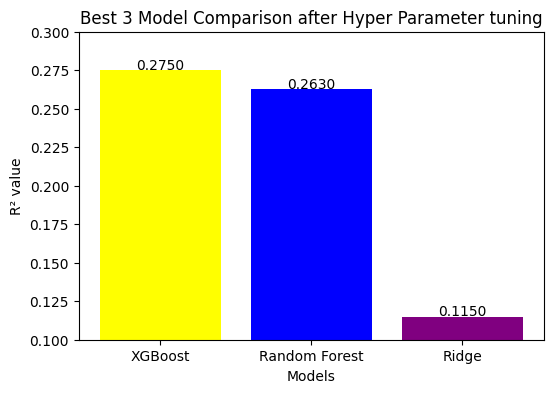

In [ ]:
display(Markdown("Best 3 Model Comparison after Hyper Parameter tuning:"))
print("XGBoost Regressor-on validation set-R² value is 0.275")
print("Random Forest Regressor -on validation set-R² value is 0.263")
print("Ridge Regression-on validation set-R² value is 0.115")
models=['XGBoost','Random Forest','Ridge']
R_square=[0.275,0.263,0.115]
plt.figure(figsize=(6,4))
plt.bar(models,R_square , color=['yellow', 'blue','purple'])
for i in range(len(models)):
    plt.text(i, R_square[i] + 0.0005, f"{R_square[i]:.4f}", ha='center', fontsize=10)

plt.xlabel("Models")
plt.ylabel("R² value")
plt.title("Best 3 Model Comparison after Hyper Parameter tuning")
plt.ylim(0.10, 0.30)
plt.show()

* **XGBoost Regression gives the largest R² value after Hyper parameter tuning.**
* **The 2nd largest R² value achieved by Random Forest Regressor.**
* **The least R² value is given by Ridge Regression.**

# BEST MODEL : XGBOOST Regresser


* XGBoost Regressor out-performs over other models, because it gave the best performance during training,validation and after hyper parameter tuning.
* After tuning hyper-parameter and cross-validation, XGBoost gave the highest R² Score(0.275) compared to other ML models Random Forest Regressor and Ridge Regression.

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

#XGBoost pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, objective='reg:squarederror'))
])
# Parameter distribution for RandomizedSearchCV
param_dist = {
    'regressor__n_estimators': randint(200, 1000),
    'regressor__learning_rate': uniform(0.01, 0.2),
    'regressor__max_depth': randint(3, 10),
    'regressor__min_child_weight': randint(1, 10),
    'regressor__subsample': uniform(0.6, 0.4),
    'regressor__colsample_bytree': uniform(0.6, 0.4),
    'regressor__gamma': uniform(0, 0.3),
    'regressor__reg_alpha': uniform(0, 1),
    'regressor__reg_lambda': uniform(1, 2)
}
# RandomizedSearchCV for hpt
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=40,  # Number of different combinations to try
    scoring='r2',
    cv=3, # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1# # Use all available CPU cores
)

# model traing using training data
random_search_xgb.fit(x_train, y_train)

# Predict and evaluate
best_xgb_model = random_search_xgb.best_estimator_
y_xgb_hpt = best_xgb_model.predict(x_valid)

print("\n")
display(Markdown("Hyper-parameter-tuned XGBoost Regressor"))
print("Best Parametrs:", random_search_xgb.best_params_)
print("R² Score:", r2_score(y_valid, y_xgb_hpt))

# # Training
display(Markdown("XGB Regressor:R² value trainig data"))
y_train_xgb = best_xgb_model.predict(x_train)
print("R² Score on training data:", r2_score(y_train, y_train_xgb))

# Validation
display(Markdown("XGB Regressor:R² value validation data"))

#y_xgb_hpt = best_xgb_model.predict(x_valid)
print("R² Score on validation data:", r2_score(y_valid, y_xgb_hpt))


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END regressor__colsample_bytree=0.7334834444556088, regressor__gamma=0.04286004537658223, regressor__learning_rate=0.14017769458977059, regressor__max_depth=7, regressor__min_child_weight=2, regressor__n_estimators=543, regressor__reg_alpha=0.8324426408004217, regressor__reg_lambda=1.4246782213565523, regressor__subsample=0.6727299868828402; total time=  13.4s
[CV] END regressor__colsample_bytree=0.7334834444556088, regressor__gamma=0.04286004537658223, regressor__learning_rate=0.14017769458977059, regressor__max_depth=7, regressor__min_child_weight=2, regressor__n_estimators=543, regressor__reg_alpha=0.8324426408004217, regressor__reg_lambda=1.4246782213565523, regressor__subsample=0.6727299868828402; total time=  13.0s
[CV] END regressor__colsample_bytree=0.6733618039413735, regressor__gamma=0.09127267288786131, regressor__learning_rate=0.11495128632644756, regressor__max_depth=6, regressor__min_child_weight=9, regres

Hyper-parameter-tuned XGBoost Regressor

Best Parametrs: {'regressor__colsample_bytree': 0.6835674870461441, 'regressor__gamma': 0.20134305504721517, 'regressor__learning_rate': 0.08172935625923278, 'regressor__max_depth': 9, 'regressor__min_child_weight': 2, 'regressor__n_estimators': 984, 'regressor__reg_alpha': 0.8486697949246744, 'regressor__reg_lambda': 1.2732426628840576, 'regressor__subsample': 0.8835643987640474}
R² Score: 0.27532759093934756


XGB Regressor:R² value trainig data

R² Score on training data: 0.9975269689997662


XGB Regressor:R² value validation data

R² Score on validation data: 0.27532759093934756

[CV] END regressor__colsample_bytree=0.7480634801021777, regressor__gamma=0.004636984958660229, regressor__learning_rate=0.1956637125175451, regressor__max_depth=3, regressor__min_child_weight=5, regressor__n_estimators=806, regressor__reg_alpha=0.9636199770892528, regressor__reg_lambda=2.70601891093472, regressor__subsample=0.7177795568278342; total time=  10.3s
[CV] END regressor__colsample_bytree=0.7540390914407701, regressor__gamma=0.25534100145505706, regressor__learning_rate=0.07338440103125553, regressor__max_depth=4, regressor__min_child_weight=9, regressor__n_estimators=934, regressor__reg_alpha=0.8442131407263114, regressor__reg_lambda=2.8600336696216635, regressor__subsample=0.6281664523398175; total time=  12.1s
[CV] END regressor__colsample_bytree=0.8211279907631631, regressor__gamma=0.08895304309433955, regressor__learning_rate=0.0939561712892553, regressor__max_depth=4, regressor__min_child_weight=9, regressor__n_estimato

**Conclussion:After Hyper paramter Tuning XGB Regressor**

* **R² Score on training data: 0.997(approx)**
* **R² Score on validation data: 0.275(approx)**
* **Best Parametrs**: {'regressor__colsample_bytree': 0.6835674870461441, 'regressor__gamma': 0.20134305504721517, 'regressor__learning_rate': 0.08172935625923278, 'regressor__max_depth': 9, 'regressor__min_child_weight': 2, 'regressor__n_estimators': 984, 'regressor__reg_alpha': 0.8486697949246744, 'regressor__reg_lambda': 1.2732426628840576, 'regressor__subsample': 0.8835643987640474}

# Submission
* To evaluate on test data

In [ ]:
y_pred=best_xgb_model.predict(X_test)
submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "purchaseValue": y_pred})
submission.to_csv('submission.csv',index=False)



[CV] END regressor__colsample_bytree=0.7540390914407701, regressor__gamma=0.25534100145505706, regressor__learning_rate=0.07338440103125553, regressor__max_depth=4, regressor__min_child_weight=9, regressor__n_estimators=934, regressor__reg_alpha=0.8442131407263114, regressor__reg_lambda=2.8600336696216635, regressor__subsample=0.6281664523398175; total time=  13.1s
[CV] END regressor__colsample_bytree=0.6835674870461441, regressor__gamma=0.20134305504721517, regressor__learning_rate=0.08172935625923278, regressor__max_depth=9, regressor__min_child_weight=2, regressor__n_estimators=984, regressor__reg_alpha=0.8486697949246744, regressor__reg_lambda=1.2732426628840576, regressor__subsample=0.8835643987640474; total time=  38.2s
[CV] END regressor__colsample_bytree=0.9193180715867101, regressor__gamma=0.19498917923332953, regressor__learning_rate=0.1503933754515407, regressor__max_depth=8, regressor__min_child_weight=3, regressor__n_estimators=670, regressor__reg_alpha=0.0276167718737047

In [ ]:
r2 = 1 - ((y_actual - y_pred)/((y_actual-y_mean))